In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report
%matplotlib inline
%run visualize_classifier.ipynb

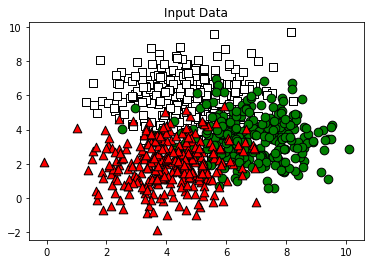

In [2]:
#Plot given data
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data [:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

plt.figure()
#[:, 0] slices the 0th column of every row
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors = 'white', edgecolors = 'black', linewidth = 1, marker = 's')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors = 'green', edgecolors = 'black', linewidth = 1, marker = 'o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors = 'red', edgecolors = 'black', linewidth = 1, marker = '^')
plt.title('Input Data')
plt.show()

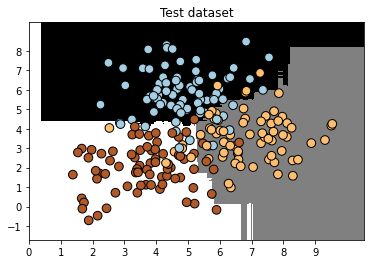

Classifier Performance on Training Dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

Classifier Performance on Test Dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.92      0.85      0.88        79
     Class-2       0.86      0.84      0.85        70

    accuracy                           0.87     16905
   macro avg       0.87      0.87      0.87     16905
weighted avg       0.87      0.87      0.87     16905



C:\Users\ricky\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 2. 1. 0. 2. 2. 0. 2. 2. 2. 2. 1. 2. 0. 1.
 2. 1. 1. 1. 0. 2. 0. 2. 2. 0. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 0. 1. 0.
 0. 2. 1. 0. 0. 0. 1. 0. 2. 0. 2. 0. 2. 0. 2. 0. 0. 2. 2. 2. 1. 2. 1. 2.
 0. 1. 2. 2. 1. 0. 2. 2. 1. 0. 1. 0. 1. 1. 2. 1. 2. 0. 1. 0. 1. 2. 1. 0.
 2. 1. 2. 1. 1. 0. 1. 2. 2. 0. 2. 1. 0. 0. 1. 1. 2. 2. 1. 0. 1. 2. 0. 0.
 1. 0. 2. 0. 0. 1. 0. 2. 0. 0. 1. 1. 2. 0. 1. 2. 0. 1. 0. 0. 2. 0. 2. 0.
 0. 2. 2. 2. 1. 1. 2. 0. 0. 0. 1. 1. 2. 1. 2. 1. 2. 1. 1. 0. 2. 2. 2. 1.
 1. 1. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 1. 0. 1. 0. 1. 2. 1. 1. 2. 2. 1. 2.
 0. 0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 0. 2. 2. 0. 2. 2. 2. 2. 0. 0. 0. 0. 2.
 2. 1. 0. 0. 2. 2. 2. 0. 2.] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\ricky\anaconda3\lib\site-packages\sklearn\me

In [3]:
#Use two different classifiers, RandomForest and Extra Random Trees Classifier, observe the difference
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 5)
params = {'n_estimators':100, 'max_depth':4, 'random_state': 0}
classifier = RandomForestClassifier(**params)
#classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

class_names = ['Class-0', 'Class-1', 'Class-2']
print("Classifier Performance on Training Dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names = class_names))
print("Classifier Performance on Test Dataset\n")
print(classification_report(y_test, y_test_pred, classifier.predict(X_test), target_names = class_names))


Confidence Measure

Datapoint: [5 5]
Probabilities: [0.81427532 0.08639273 0.09933195]
Predicted class: Class-0

Datapoint: [3 6]
Probabilities: [0.93574458 0.02465345 0.03960197]
Predicted class: Class-0

Datapoint: [6 4]
Probabilities: [0.12232404 0.7451078  0.13256816]
Predicted class: Class-1

Datapoint: [7 2]
Probabilities: [0.05415465 0.70660226 0.23924309]
Predicted class: Class-1

Datapoint: [4 4]
Probabilities: [0.20594744 0.15523491 0.63881765]
Predicted class: Class-2

Datapoint: [5 2]
Probabilities: [0.05403583 0.0931115  0.85285267]
Predicted class: Class-2


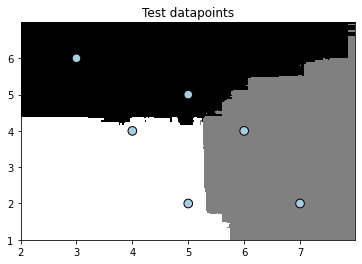

In [4]:
#Manually add datapoints to test, then plot/accuracy score

test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

print('Confidence Measure')
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('\nDatapoint:', datapoint)
    print('Probabilities:', probabilities)
    print('Predicted class:', predicted_class)

visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'Test datapoints')